In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import matplotlib.pyplot as plt

In [2]:
import scvi

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [3]:
Path="/home/mgander/mouse_atlas/data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [4]:
# Load the adata

# Take the correct one from the next 3 cells to get the anndata you want

In [5]:
# Pre-Gastrulation

adatas=[]
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[0]}_{ts[1]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[2]}_{ts[3]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[4]}_{ts[5]}.h5ad").raw.to_adata())
adata=anndata.concat(adatas)
del adatas

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [22]:
# Gastrulation

adatas=[]
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[5]}_{ts[6]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[7]}_{ts[8]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[9]}_{ts[10]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[11]}_{ts[12]}.h5ad").raw.to_adata())
adata_d=sc.read(f"{Path}/Comb_anndatas/adata_{ts[12]}_{ts[13]}.h5ad").raw.to_adata()
adata_d=adata_d[adata_d.obs['day']==8.5].copy()
adatas.append(adata_d)
adata=anndata.concat(adatas)
del adatas

Only considering the two last: ['.75', '.h5ad'].
Only considering the two last: ['.75', '.h5ad'].
Only considering the two last: ['.25', '.h5ad'].
Only considering the two last: ['.25', '.h5ad'].
Only considering the two last: ['.75', '.h5ad'].
Only considering the two last: ['.75', '.h5ad'].
Only considering the two last: ['.25', '.h5ad'].
Only considering the two last: ['.25', '.h5ad'].
Only considering the two last: ['.5a', '.h5ad'].
Only considering the two last: ['.5a', '.h5ad'].


In [ ]:
# Organogenesis

adatas=[]
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[13]}_{ts[14]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[15]}_{ts[16]}.h5ad").raw.to_adata())
adatas.append(sc.read(f"{Path}/Comb_anndatas/adata_{ts[17]}_{ts[18]}.h5ad").raw.to_adata())
adata_d=sc.read(f"{Path}/Comb_anndatas/adata_{ts[18]}_{ts[19]}.h5ad").raw.to_adata()
adata_d=adata[adata.obs['day']==13.5].copy()
adatas.append(adata_d)
adata=anndata.concat(adatas)
del adatas

Only considering the two last: ['.5b', '.h5ad'].
Only considering the two last: ['.5b', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [5]:
# I chose n_top_genes=2000 for Pre-Gastriulation, 3000 and Gastrulation and 5000 for Organogenesis

sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=2000, subset=True)
#sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000, subset=True)
#sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=5000, subset=True)

## Run scVI
##### following https://docs.scvi-tools.org/en/stable/tutorials/notebooks/scrna/harmonization.html

In [6]:
scvi.model.SCVI.setup_anndata(adata)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [7]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [8]:
model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 400/400: 100%|████████████| 400/400 [06:17<00:00,  1.11it/s, v_num=1, train_loss_step=1.11e+3, train_loss_epoch=1.23e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|████████████| 400/400 [06:17<00:00,  1.06it/s, v_num=1, train_loss_step=1.11e+3, train_loss_epoch=1.23e+3]


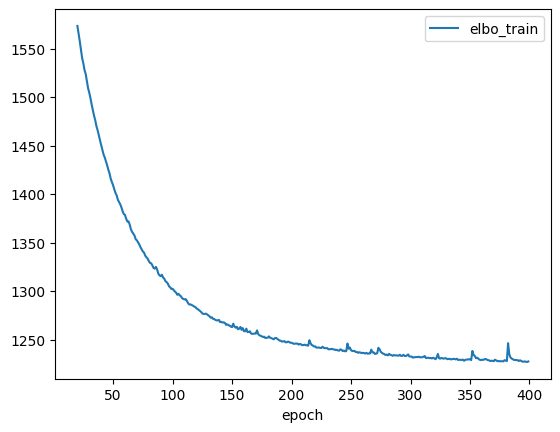

In [9]:
fig, ax = plt.subplots()
model.history["elbo_train"].iloc[20:].plot(ax=ax, label="train")
plt.legend()

In [10]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [11]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)

In [12]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


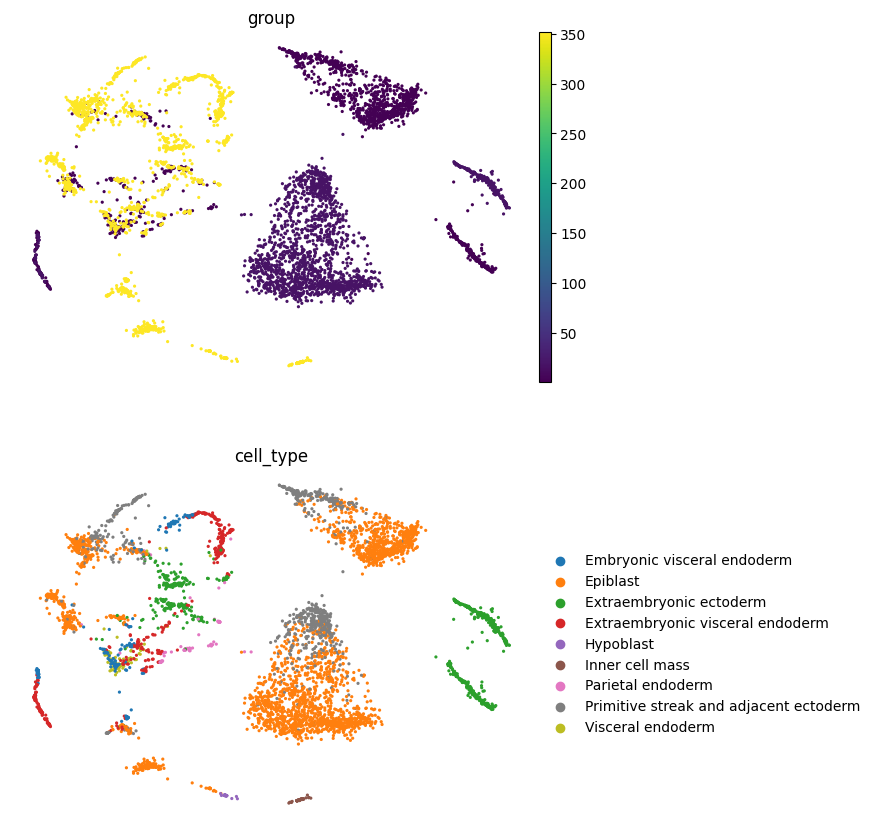

In [13]:
# Pregastrulation
sc.pl.embedding(adata, basis=SCVI_MDE_KEY, color=["group", "cell_type"], frameon=False, ncols=1)

In [ ]:
# Batch effects are huge, but since we want to test performance of moscot/TOME against batch effects this
# actually good

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


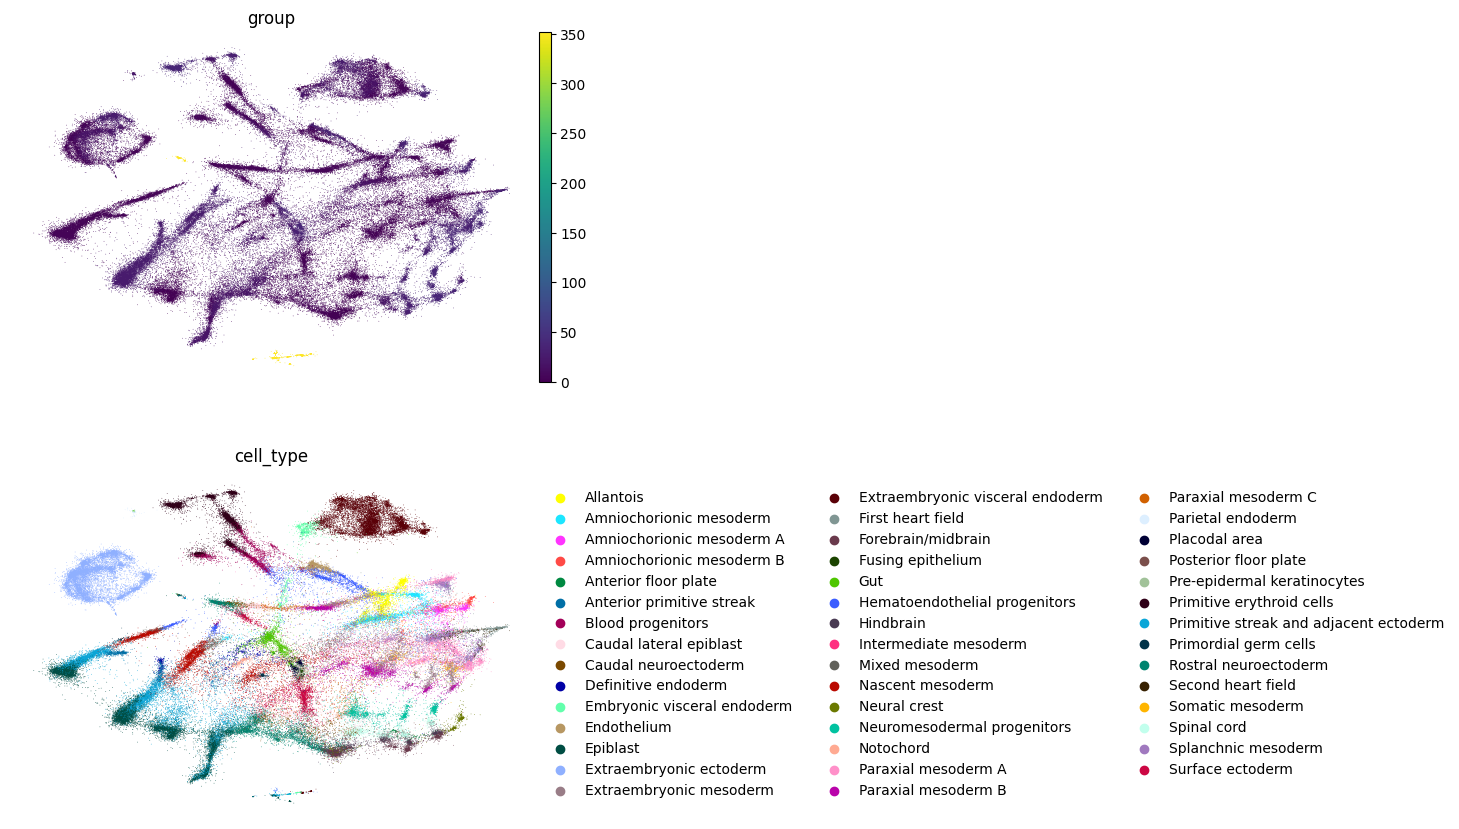

In [34]:
# Gastrulation
sc.pl.embedding(adata, basis=SCVI_MDE_KEY, color=["group", "cell_type"], frameon=False, ncols=1)

### Get 3d UMAP as the latent representations for TOME

In [14]:
sc.tl.umap(adata, n_components=3)

In [16]:
cells=list(adata.obs['cellID'])

umap=adata.obsm['X_umap']
umap=pd.DataFrame(data=umap, index=cells)

scvi_full=adata.obsm['X_scVI']
scvi_full=pd.DataFrame(data=scvi_full, index=cells)

In [9]:
days=sorted(set(adata.obs['day']))

In [ ]:
for i in range(len(days)-1):
    day0=days[i]
    day1=days[i+1]
    
    sub_adata=adata[adata.obs['day'].isin([day0, day1])].copy()
    cells=list(sub_adata.obs['cellID'])
    ts0,ts1=sorted(set([a.split(':')[0] for a in adata.obs['cell_state']]))

    
    sub_umap=sub_adata.obs['X_umap']
    sub_umap=pd.DataFrame(data=sub_umap, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'], index=cells)
    sub_umap.to_csv(f'{Path}/scVI_representations/{ts0}_{ts1}_umap3.csv')
    
    
    sub_scVI=sub_adata.obs['X_scVI']
    sub_scVI=pd.DataFrame(data=sub_scVI, index=cells)
    sub_scVI.to_pickle(f'{Path}/scVI_representations/{ts0}_{ts1}_scVI.csv')

In [ ]:
D={}
for i in range(18):
    ts0=ts[i]
    ts1=ts[i+1]
    if i<4.5:
        D[f'{ts0}_{ts1}']='Pregastrualtion'
    elif i<12.5:
        D[f'{ts0}_{ts1}']='Gastrualtion'
    else:
        D[f'{ts0}_{ts1}']='Organogenesis'